In [35]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import torch
import scipy

import os, sys
sys.path.append(os.path.join(os.getcwd(), '../sympde'))

from viz.general_plots import imshows
from lconv.generator import Generator
from lconv.mnist import MnistDataset

plt.rcParams['image.cmap'] = 'seismic'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
N_samples = 5
dim = 16

gen = Generator(dim = dim)
Ls = gen.D.clone().detach()
Ls_titles = gen.D_titles

Ls = torch.cat([Ls, (gen.xLy - gen.yLx).unsqueeze(0)])
Ls_titles.append(r'$L_\theta = xL_y - yL_x$')

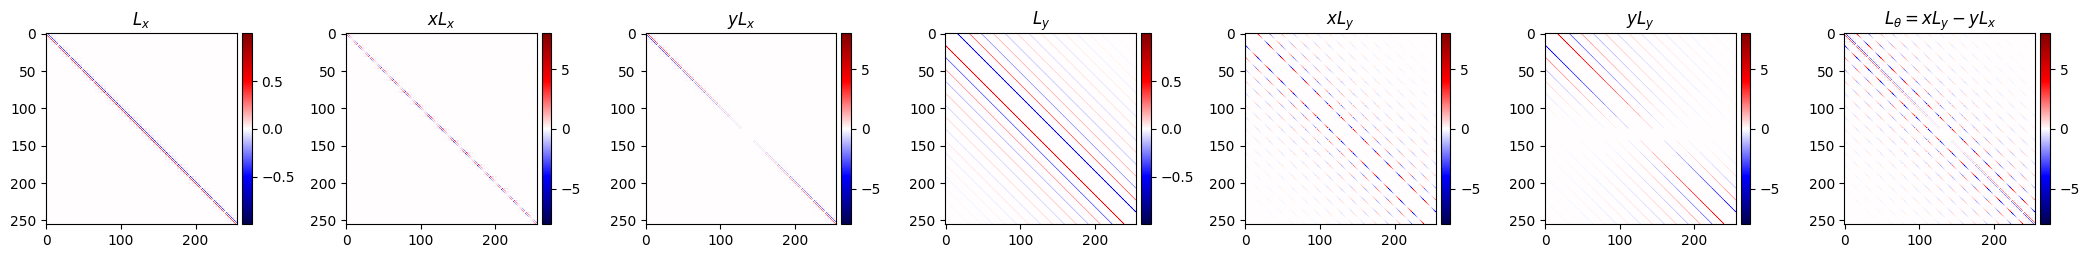

In [37]:
imshows(Ls, titles = Ls_titles, vminmaxs = 'separate')

In [38]:
dataset = MnistDataset(mode='test', r = 0, dim = dim, N = N_samples, return_rot = False)
# imshows(dataset[:].reshape(N_samples, dim, dim), imshow_kwargs = dict(cmap = 'gray'))

In [39]:
def get_L_exp(L, t: float = 1.):
    return scipy.linalg.expm(t * L)

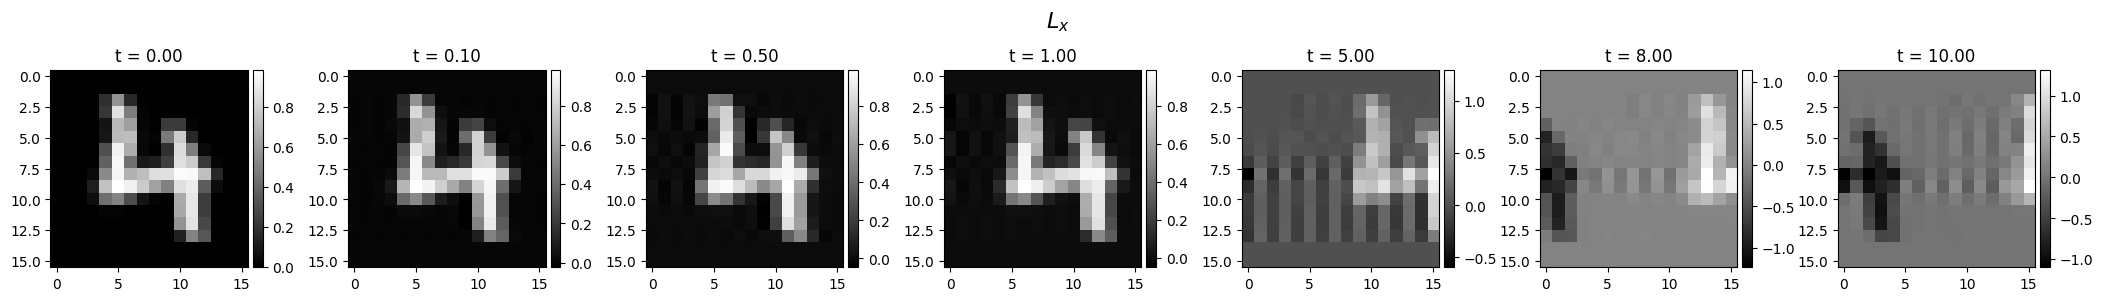

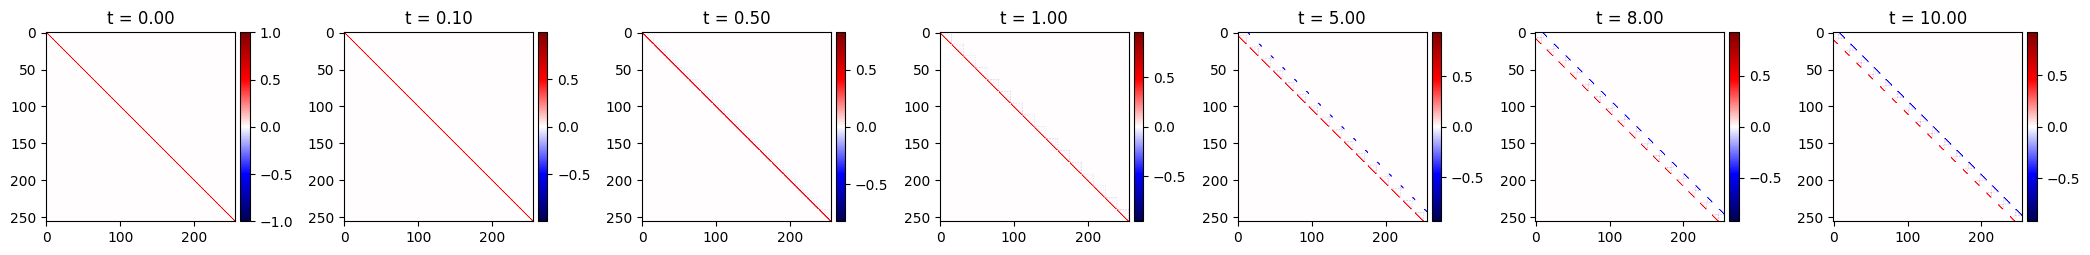

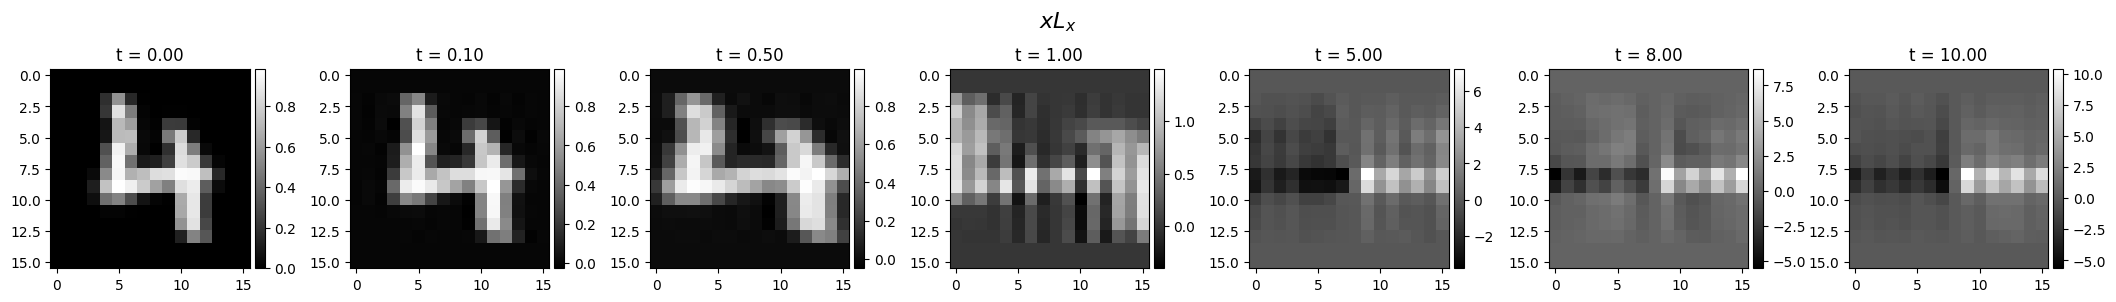

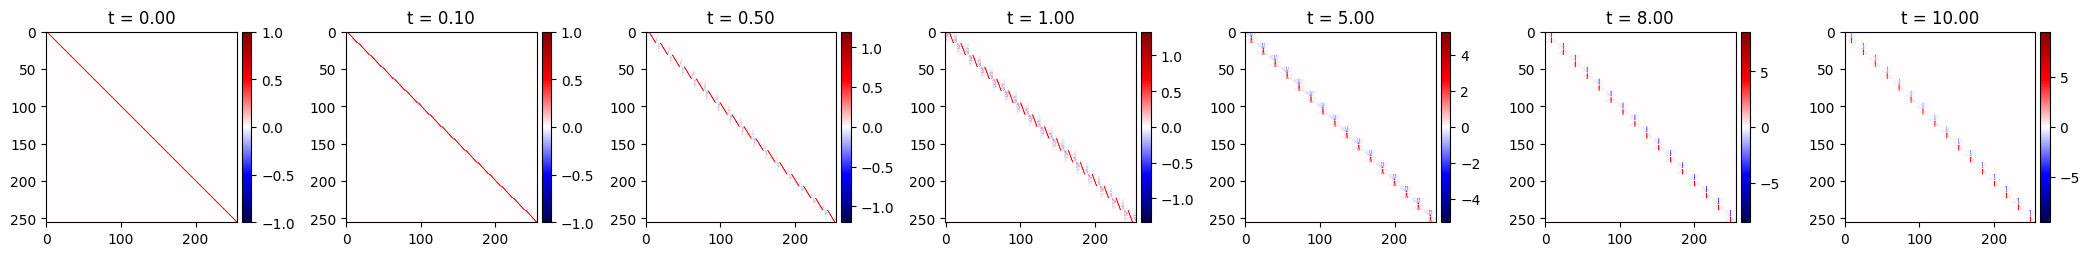

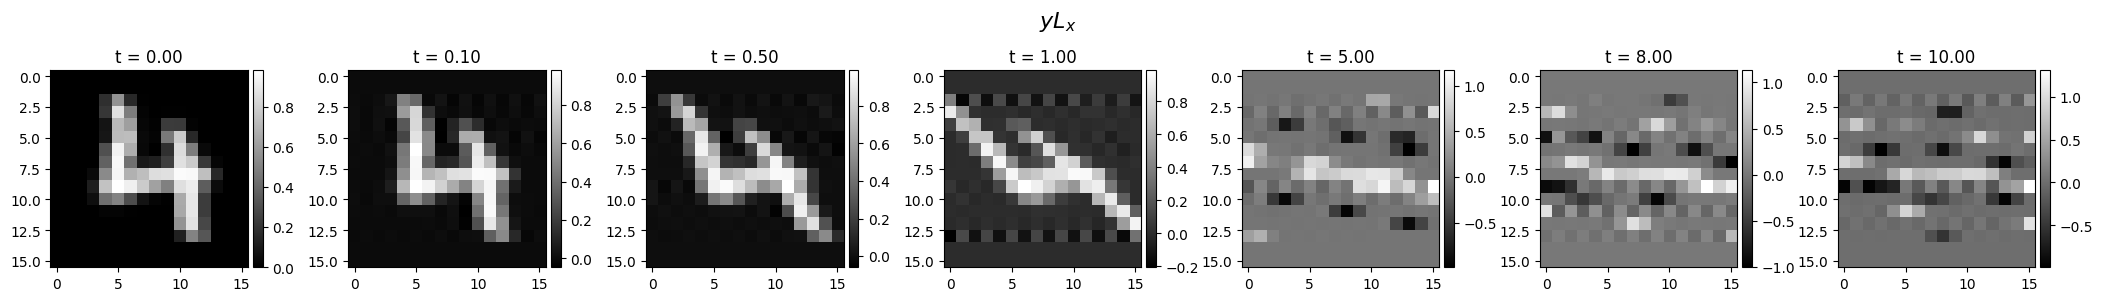

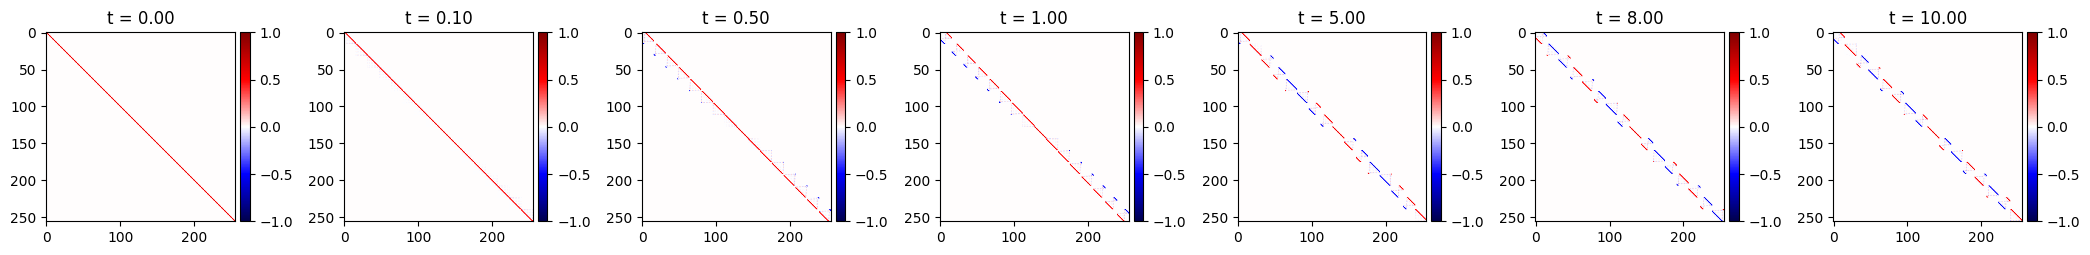

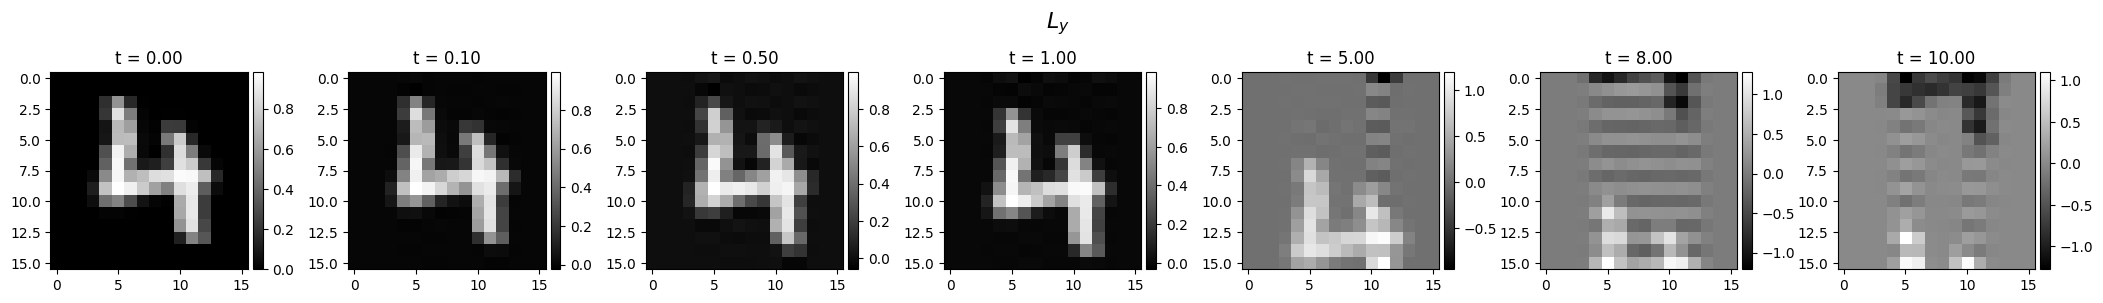

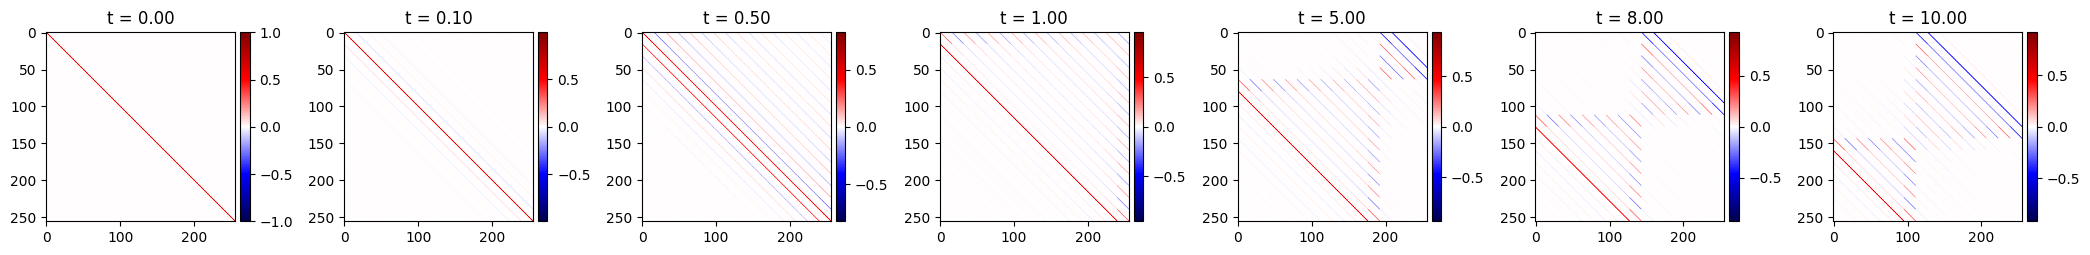

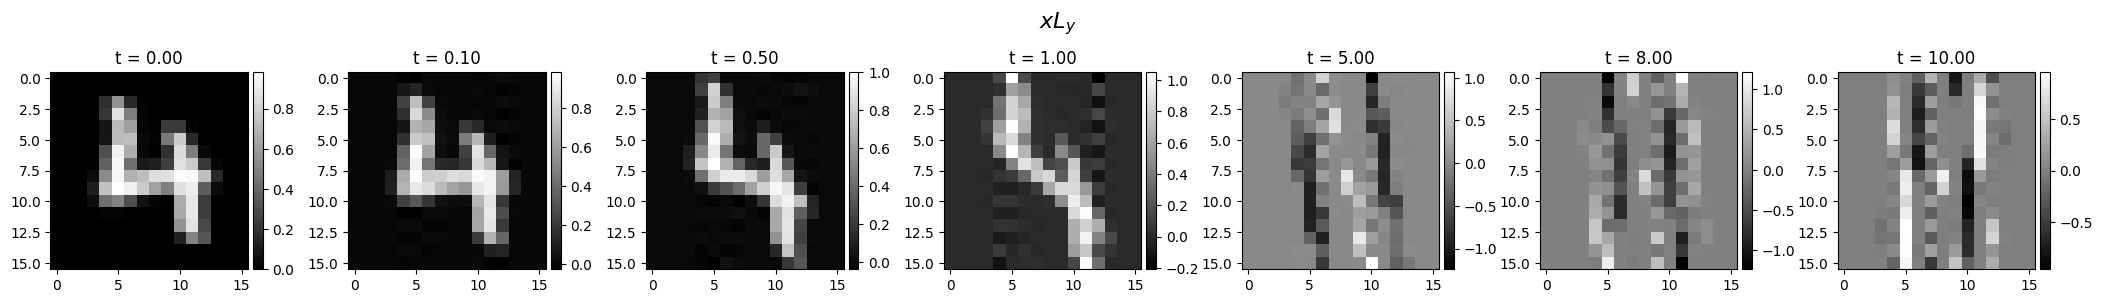

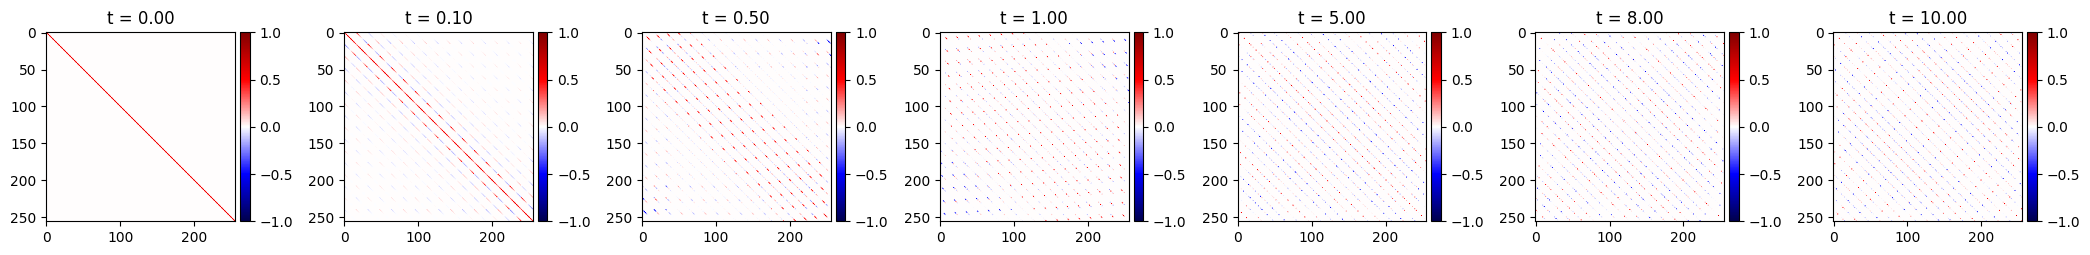

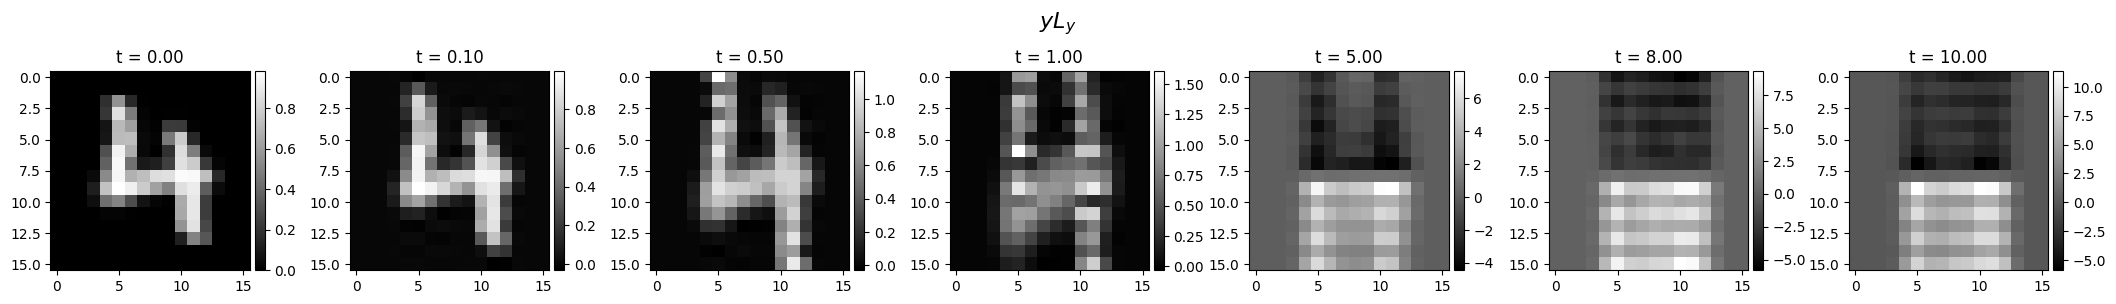

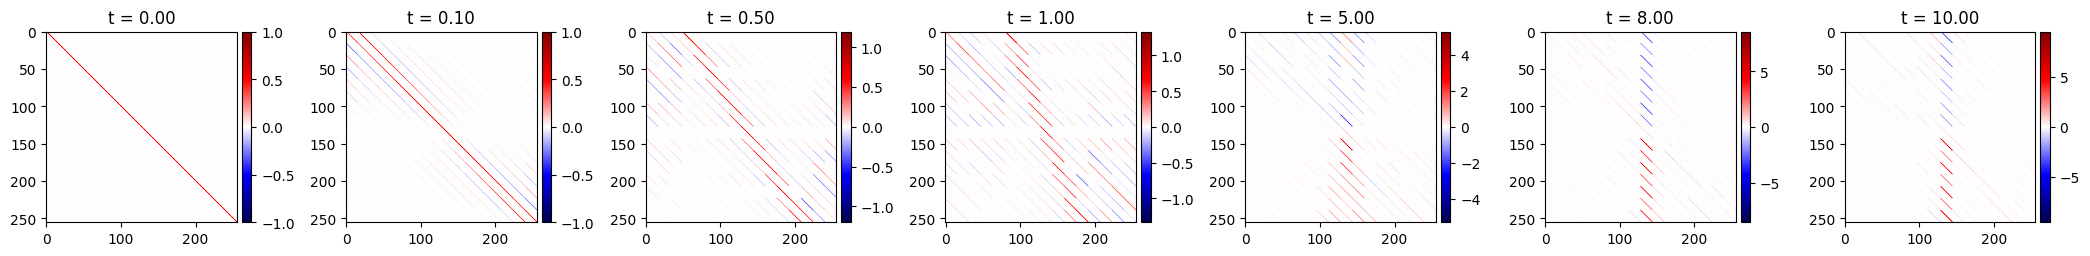

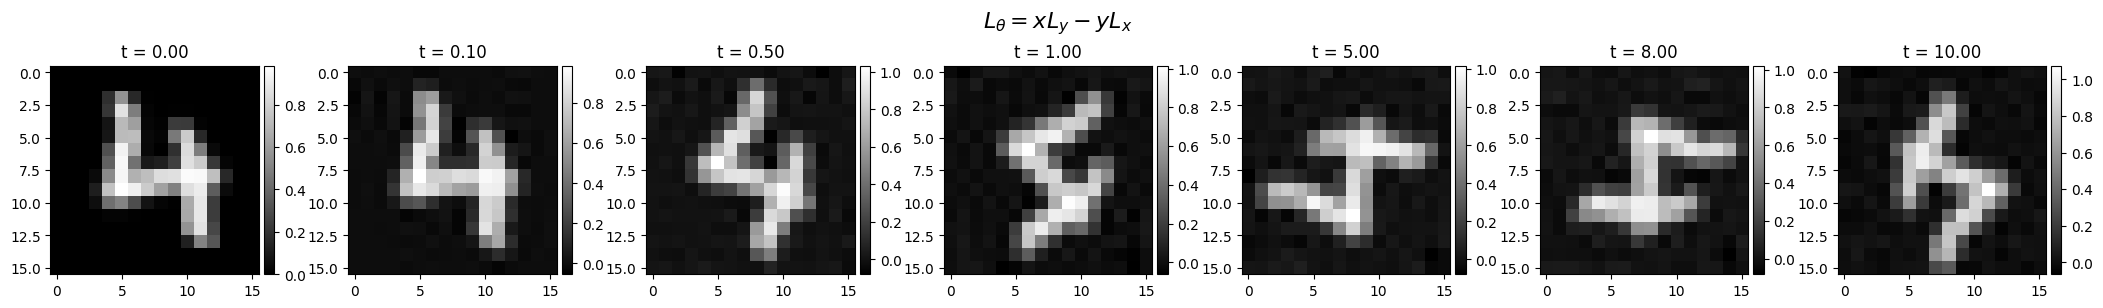

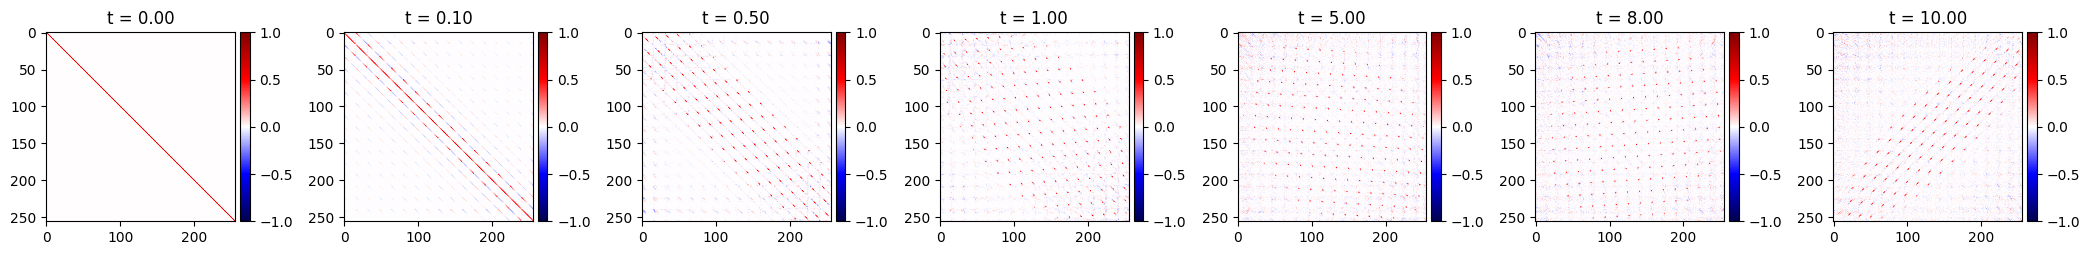

In [40]:
def plot_transfs(L, x_org, suptitle = None):
    
    ts = np.array([0, 0.1, 0.5, 1., 5., 8., 10.])
    x = x_org.reshape(-1, 1)
    x_tranfs, L_exps = [], []

    for t in ts:
        L_exp = get_L_exp(L = L, t=t)
        x_transf = np.dot(L_exp, x).reshape(dim, dim)

        x_tranfs.append(x_transf)
        L_exps.append(L_exp)

    titles = [f't = {t:.2f}' for t in ts]
    imshows(x_tranfs, imshow_kwargs = dict(cmap = 'gray'), vminmaxs = None, titles = titles, suptitle = suptitle)
    imshows(L_exps, imshow_kwargs = dict(cmap = 'seismic'), vminmaxs = 'separate', titles = titles, )

    return x_tranfs, L_exps


img = dataset[0].squeeze(0)
x_org = img

for L, L_title in zip(Ls, Ls_titles):
    plot_transfs(L = L, x_org = x_org, suptitle = L_title)

### Notes
- Large $t$ in $e^{tL}$ produces artefacts